#$K$-means and Hierarchical Clustering for the Abalone Data Set


###Loading the modules
#####In this section we will include the modules we require in the entire notebook.

In the following code block we will import all the modules we need for this project. 

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-darkgrid') 

#####In this section we will include the Machine Learning method for the clustering

In [ ]:
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

###Importing the data
#####In this section we will include all the necessary steps to get and read the data into a dataframe. 

In [ ]:
from sklearn import datasets
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
                   header=None, names=['sex', 'length', 'diameter', 'height', 'weight', 'shucked_weight',
                                       'viscera_weight', 'shell_weight', 'rings'])
abalone=data

#### Some information about the Data Set</i></h1>
Here we will take some time to describe the Data Set. We are going to be working with an UCI repository Data Set about Abalones. 

Ablones are a molusce used for both human consumption and recreatioal harvesting. 
![](https://drive.google.com/uc?export=view&id=1mGYaOPwmlO9H77BOA4u9SBHSR6ySHx6o)

This Data Set was made for reserches studying methods to determine the age of the Abalones usings its pshysical characteristics. The UCI repository show us the following description about the Data Set: 


Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).


<p style="text-align:justify;">In the following Block the Data Set is imported with its characteristics:</p>
<ul>
<li><strong>Sex</strong>: Wether the Abalone is Female(F), Male(M) or indeterminated due to its age (I) </li>
<li><strong>Length: </strong>Lenght of its shell. (milimiters)</li>
<li><strong>Diameter: </strong>Diameter of its shell. (milimiters)</li>
<li><strong>Height: </strong>Height of its shell (Width of its shell). (milimiters)</li>
<li><strong>Weight: </strong>Weight of the Abalone.(grams)</li>
<li><strong>Shucked Weight: </strong>Weight of the Abalone without its shell.(grams)</li>
<li><strong>Viscera Weight: </strong>Weight of the Abalone guts.(grams)</li>
<li><strong>Shell  Weight: </strong>Weight of the Abalone shell.(grams)</li>
<li><strong>Rings : </strong>Number of rings in the Abalone's shell. (Integer)</li>
</ul>

<p>Now, with the data already imported we will make it more easy to manage, for that reason we get rid of the Sex columns. If you don't want to remove that column you could make that column numeric as it follows: </p>
<ul>
<li>If its Female (F) then we asign it the value of 0</li>
<li>If its Indeterminated (I) then we asign it the value of 1</li>
<li>If its Male (M) then we asign it the value of 2</li>
</ul>
<br>



### Preliminary Analysis 
In here you must see if your data is complete (check
if there is any NaN and get rid of them in a suitable way), see the distribution of the
features, and normalize.

In [ ]:
abalone_df = pd.DataFrame(abalone, index = [i for i in range(1, 4178)])
del abalone_df['sex']
abalone_df.head() #Here we see the first 5 rows of our dataset
for i in abalone_df.columns[:]:
  abalone_df[i] = abalone_df[i].fillna(abalone.describe()[i]['mean']) #replace NaN values with its mean 

SyntaxError: ignored

In [ ]:
abalone_df.info()
        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 1 to 4177
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          4177 non-null   float64
 1   diameter        4177 non-null   float64
 2   height          4177 non-null   float64
 3   weight          4177 non-null   float64
 4   shucked_weight  4177 non-null   float64
 5   viscera_weight  4177 non-null   float64
 6   shell_weight    4177 non-null   float64
 7   rings           4177 non-null   float64
dtypes: float64(8)
memory usage: 293.7 KB


In [ ]:
abalone.describe()

,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
abalone_df[0:20]#First 20 values

,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8.0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20.0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16.0
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9.0
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19.0
10,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14.0


In [ ]:
#Normalizing the Data
abalone_matrix = pd.DataFrame.to_numpy(abalone_df)
abalone_normal = normalize(abalone_matrix, axis=0, norm='l2')
abalone_normalDF = pd.DataFrame(abalone_normal, columns = abalone_df.columns[:], index = [i for i in range(1, 4178)])
abalone_normalDF[0:20] #First 20 valuesb

,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings
1,0.010074,0.009768,0.009560,0.003623,0.003645,0.003552,0.003918,0.010372
2,0.015254,0.015481,0.014341,0.010878,0.009396,0.010363,0.011754,0.013336
3,0.012664,0.013453,0.013278,0.008291,0.007894,0.008349,0.008675,0.014817
4,0.009498,0.009399,0.008498,0.003294,0.003278,0.002893,0.003078,0.010372
5,0.012232,0.011058,0.010091,0.005648,0.005165,0.005676,0.006716,0.011854
6,0.015254,0.015296,0.015934,0.012492,0.008682,0.010363,0.018470,0.029635
7,0.015686,0.015665,0.013278,0.012340,0.010769,0.010949,0.014552,0.023708
8,0.013671,0.013638,0.013278,0.008186,0.007931,0.008239,0.009235,0.013336
9,0.015830,0.016218,0.015934,0.014372,0.011520,0.011059,0.017911,0.028153
10,0.015110,0.014006,0.014872,0.009745,0.007106,0.010803,0.011754,0.020744


### Clustering $K$-Means
In the following block we will see some the major statistics values about the Data Set.

####We will focus our anlysis with respect of the number of rings in the Abalone
In the following block of code we have the absolute frequency of the normalized rings. </p>

In [ ]:
abalone_df.groupby('rings').size()

rings
1.000000       1
2.000000       1
3.000000      15
4.000000      57
5.000000     115
6.000000     259
7.000000     391
8.000000     568
9.000000     689
9.933684       1
10.000000    634
11.000000    487
12.000000    267
13.000000    203
14.000000    126
15.000000    102
16.000000     67
17.000000     58
18.000000     42
19.000000     32
20.000000     26
21.000000     14
22.000000      6
23.000000      9
24.000000      2
25.000000      1
26.000000      1
27.000000      2
29.000000      1
dtype: int64

In [ ]:
abalone_normalDF.groupby('rings').size()

rings
0.001482      1
0.002963      1
0.004445     15
0.005927     57
0.007409    115
0.008890    259
0.010372    391
0.011854    568
0.013336    689
0.014719      1
0.014817    634
0.016299    487
0.017781    267
0.019263    203
0.020744    126
0.022226    102
0.023708     67
0.025190     58
0.026671     42
0.028153     32
0.029635     26
0.031117     14
0.032598      6
0.034080      9
0.035562      2
0.037044      1
0.038525      1
0.040007      2
0.042971      1
dtype: int64

Text(0.5, 1.0, 'Histogram of the normalized rings')

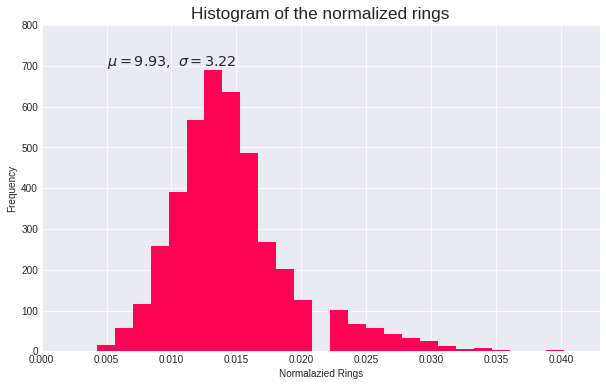

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(abalone_normalDF['rings'], bins=30, histtype='stepfilled', 
         color='#fc0356')
plt.xlabel('Normalazied Rings')
plt.ylabel('Frequency')
plt.text(0.005, 700, r'$\mu={:.2f},\ \sigma={:.2f}$'.format(abalone.describe()['rings']['mean'],
                                                    abalone.describe()['rings']['std']),
         size='x-large')
plt.xlim(0, abalone_normalDF.max()['rings'])
plt.ylim(0, 800)
plt.grid(True)
plt.title('Histogram of the normalized rings', size='xx-large')

#### Visualization
With that being said, our major characteristics of analysis will be the lenght, diameter and the height. In order to how these characteristics are distributed with respect of the normalized number of rings we use the <i>Seaborn</i> library to plot the distributions.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


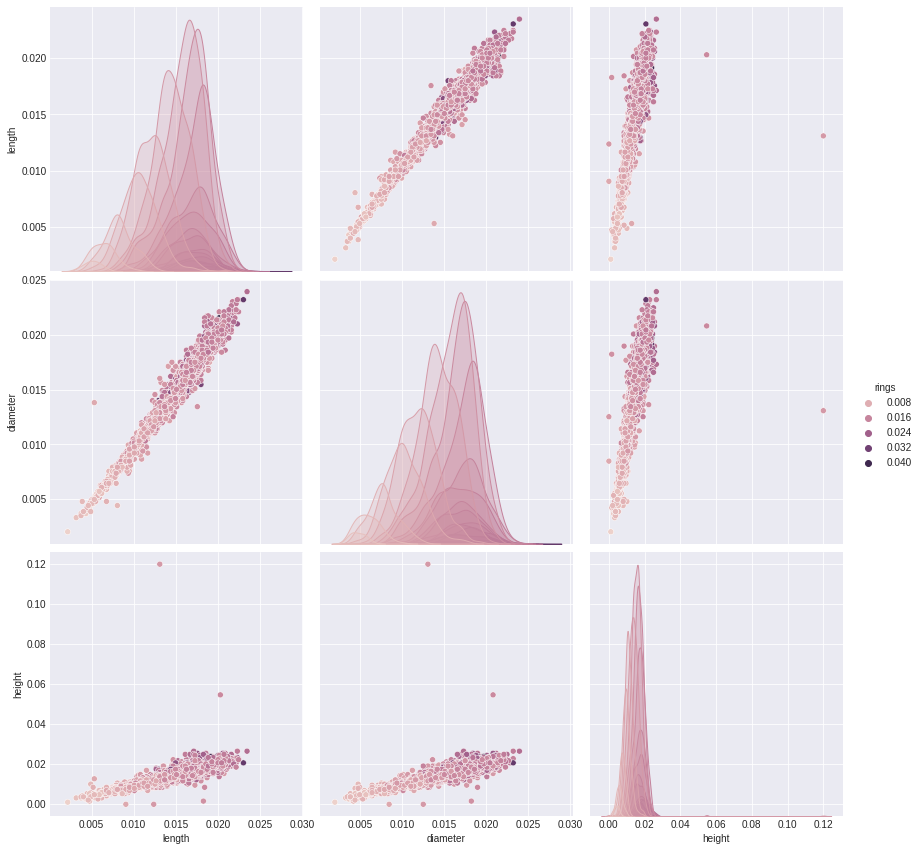

In [ ]:

sb.pairplot(abalone_normalDF.dropna(), hue='rings',size=4,vars=['length', 'diameter', 'height'],kind='scatter')


[Text(0.5, 0, 'Rings')]

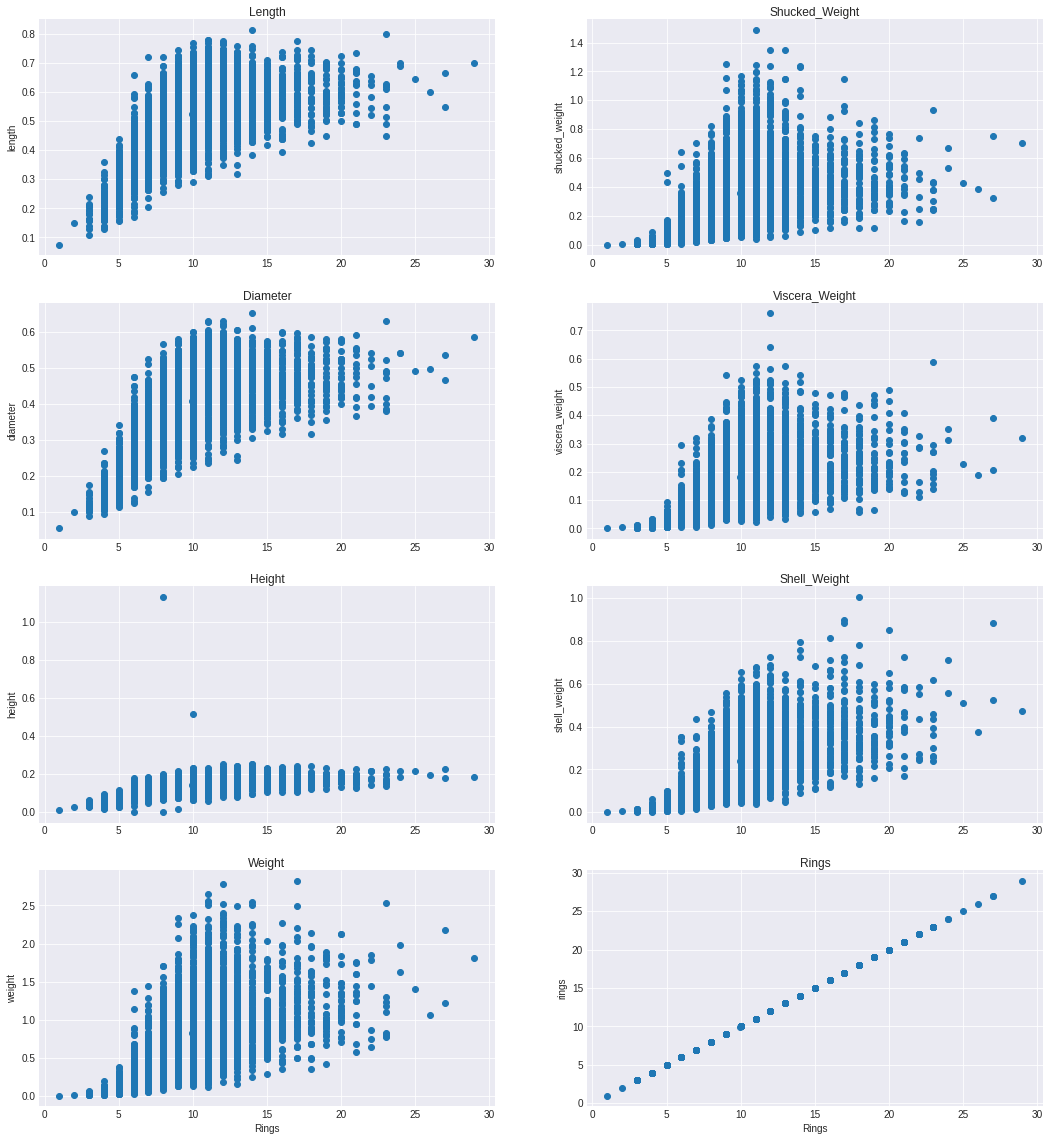

In [ ]:
def indices(i):
  if i%2==0:
    return int(.5*i)
  else:
    return int(3.5 + .5*i)
fig, axs = plt.subplots(4, 2, figsize=(18,20))
lista = [(i, j) for j in range(2) for i in range(4)]
for i, j in enumerate(abalone_df.columns):
  axs[lista[i][0], lista[i][1]].scatter(abalone_df['rings'], abalone_df[j])
  axs[lista[i][0], lista[i][1]].set_title(j.title(), pad=1.5)
  axs.flat[i].set(xlabel='', ylabel=abalone_df.columns[indices(i)])
axs.flat[6].set(xlabel='Rings')
axs.flat[7].set(xlabel='Rings')
# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()


####Begining of the model </strong></h1>
After we use the $k$-means clustering we must determine how many clusters will be used. In order to do so, the elbow method will be aplied. Due to memory restrictions the iterations are restricted to $k_{max}=15$

In [ ]:
kmax = 15
energy = list()# the intra-group inertia
for i in range(1,kmax):
    kmeans = KMeans(i,max_iter= 100)
    kmeans.fit(abalone_normalDF)
    energy +=[kmeans.inertia_]
    if i >1:
      #Avoids index errorr. The range starts at 1.
      try: 
        print(round(energy[i-2]-energy[i-1],2)) 
      except IndexError:
        pass
    else:
      print(round(energy[0],2))

1.34
0.8
0.2
0.08
0.04
0.02
0.02
0.02
0.01
0.01
0.01
0.01
0.01
0.01


In [ ]:
energyDF = pd.DataFrame(energy, columns=['Energy'], index = [i for i in range(1, 15)])
energyDF

,Energy
1,1.341296
2,0.545364
3,0.347027
4,0.263455
5,0.220429
6,0.197514
7,0.177136
8,0.161665
9,0.149354
10,0.138398


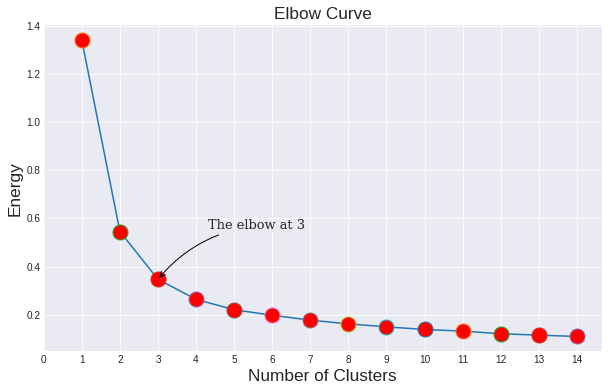

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,kmax),energy)
for x,y in zip(range(1,kmax), energy):
  plt.plot(x, y, marker="o", markersize=15, markerfacecolor="red")
plt.xticks(np.arange(0,kmax,1))
plt.xlabel('Number of Clusters',size='xx-large')
plt.ylabel('Energy',size='xx-large')
plt.title('Elbow Curve', size='xx-large')
plt.annotate("The elbow at %d" % 3,
            fontsize=13, family="serif",
            xy=(3, energy[2]), xycoords='data',
            xytext=(+50, +50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3, rad=.2"));
plt.show()

####Now we initializate the model. </he>

In [ ]:
X = np.array(abalone_normalDF[['length', 'diameter', 'height']])
Y = np.array(abalone_normalDF['rings'])
X.shape

(4177, 3)

####Since we have a lot of Data, 4177 rows, the first plot only consists of a sample of 100 points</h2>

Text(0.5, 0.92, 'Plotting the first 100 values')

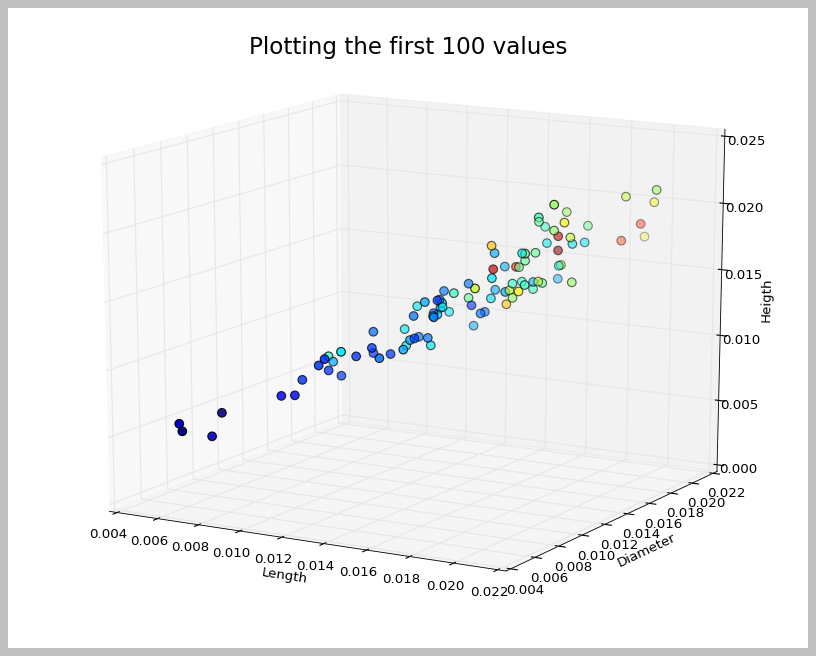

In [ ]:

plt.style.use('classic')
X100 = X[0:100, ::]
Y100 = Y[:100]
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig, xlabel='Length', ylabel='Diameter', zlabel='Heigth', elev=15)
ax.scatter(X100[:, 0], X100[:, 1], X100[:, 2], c=Y100,s=60) #The colours will be represented by the rings. 
plt.title('Plotting the first 100 values', size ='xx-large')


####In the following block we plot all the data</h2>

Text(0.5, 0.92, 'Plotting All the data')

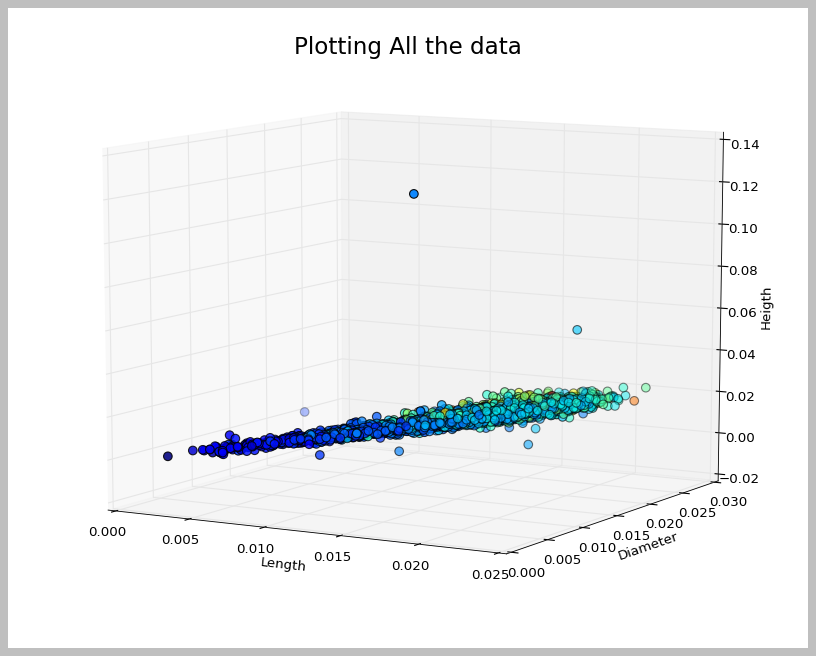

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig, xlabel='Length', ylabel='Diameter', zlabel='Heigth', elev=10)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y,s=60)
plt.title('Plotting All the data', size ='xx-large')

####Using the $K$-Means function from the <i>Sklearn</i> library we can determine the position of the centers in the plot.</h3>

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['x','y','z'], index = [i+1 for i in range(3)])
centroids

,x,y,z
1,0.018106,0.018263,0.018522
2,0.014507,0.014396,0.013808
3,0.009613,0.009246,0.008768


In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
labels

array([2, 1, 1, ..., 0, 0, 1], dtype=int32)

Text(0.5, 0.92, 'Clustering with all the DataSet')

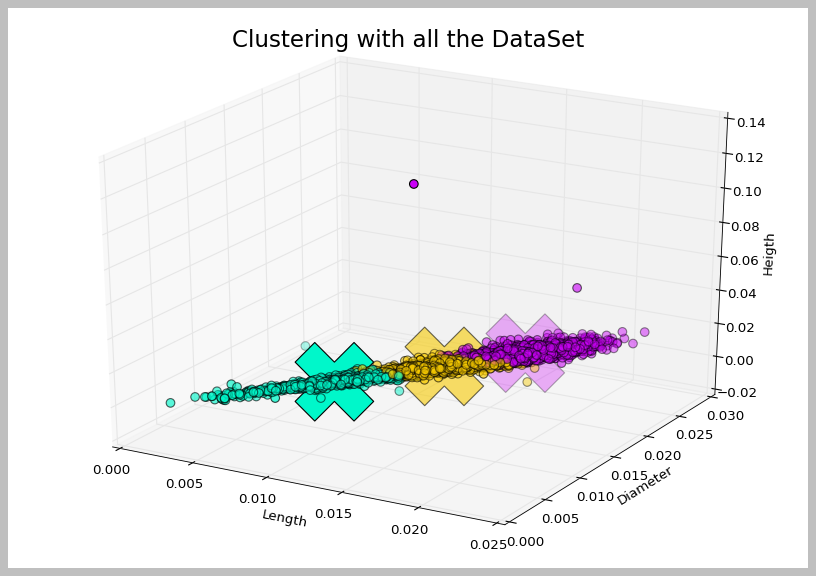

In [ ]:

# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['#ca00f7','#f7ca00','#00f7ca']
clusters=[]
for row in labels:
    clusters.append(colores[row]) #Gets the color for the clusters and the points that belong to them.

fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig,  xlabel='Length', ylabel='Diameter', zlabel='Heigth',elev=25)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='X', c=colores, s=5000)
plt.title("Clustering with all the DataSet", size='xx-large')


####Now we do the same with a 100 points sample. 

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X100)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['x','y','z'], index = [i+1 for i in range(3)])
centroids

,x,y,z
1,0.017094,0.017351,0.017268
2,0.009740,0.009506,0.008638
3,0.014049,0.013988,0.013066


Text(0.5, 0.92, 'Clustering with a sample of 100 points')

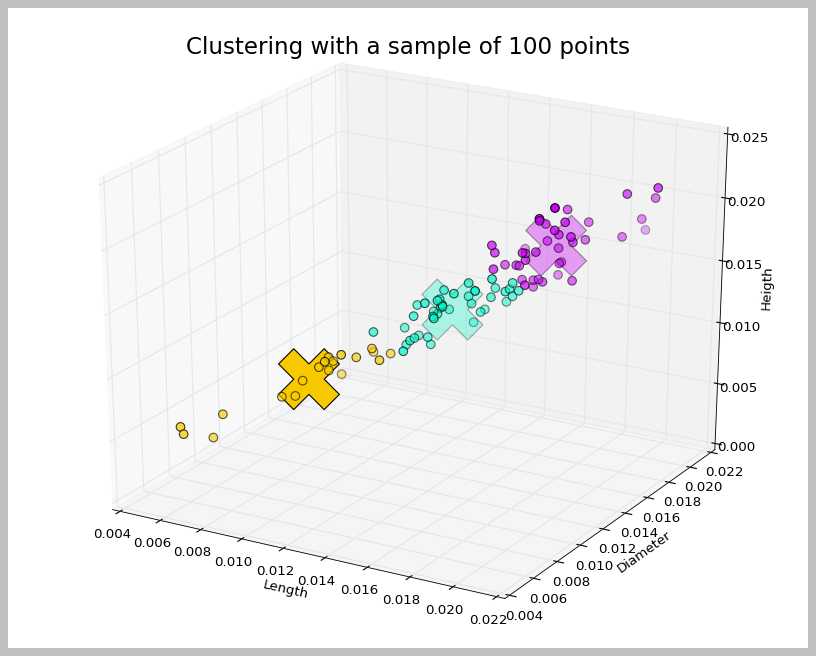

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X100)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['#ca00f7','#f7ca00','#00f7ca']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig,  xlabel='Length', ylabel='Diameter', zlabel='Heigth',elev=25)
ax.scatter(X100[:, 0], X100[:, 1], X100[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='X', c=colores, s=3000)
plt.title("Clustering with a sample of 100 points", size='xx-large')

###Observartion
All our insights must be place here, including further actions.

The $k-$means clustering is an unsupervised learning method and this method basically to add the unlabeled data set into different cluster. In our investigation problem about the Abalone Data Set the first thing that we notice is that we used the $k$-means clustering with grafics in three dimensions and we did it becuase it is easier to make a visual analysis. We used the principal component analysis (PCA) in Hierachical clustering because of the recursive nature of the method and in the HC-method we used the analysis clustering in two dimension, which provied a complete analysis for this assigment.

Other important thing is that we separate the abalones in groups only taking importance to their characteristic ${\rm length}$, ${\rm diameter}$ and ${\rm height}$ and we can see that small abalones means, less length, diameter and height, in our observation.

In the process of studying the Abalone Data Set, we took the decision to remove the column associated with the ${\rm sex}$ of the Abalone; this in order to facilitate the analysis and leave us with only quantitative data in the dataset. We firmly believe that a more rigorous analysis should contain a qualitative variable such as the ${\rm sex}$ of the Abalone to allow us to make a clustering that considers this characteristic.

For missing values NaN, they were filled with the ${\rm mean}$ of each column. However, we consider that for a more rigorous analysis we should have eliminated that associated row (even losing information) or using the statistic technique for to fill that missing values. The problem with filling those missing values with the ${\rm mean}$ (which is a measure of central tendency) is that we somehow "bias" the information, which for prediction techniques (which we do not apply here), could represent a serious problem. However, for the purposes of the present analysis, we consider that is not a major problem due to the nature of the data. However, we can observe directly in the clustering how there is a significant amount of outliers which can be a problem when considering the clustering.

Another interesting feature that could lead to future analyses is to consider the qualitative caharacteristic ${\rm sex}$, by making the change indicated at the beginning of this assigment and comparing the feature ${\rm sex}$ with the groupings and see if this changes. 

A more rigorous analysis of the histograms should also make the analysis clearer for future studies. 

We also consider that an interesting work would be to try to answer the original UCI problem which is about data prediction, where we could use regression analysis techniques to locate those outliers in a strict way and see how they affect the information in the clusters.

Finally, considering other clusters should be interesting; even to our current knowledge we see that this work could be implemented in other areas such as Food Engineering to study nutritional information. However, we consider that we need more information such as different samples from different locations. At the moment our current work should bring us closer to being able to identify important Abalone populations from the clusters that have been found by adding information such as location to the Abalone Data Set.




###Extra Hierarchical Clustering
Here we use the Hierarchical Clustering method in the Abalone Data Set

First we import the libraries that we need.

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Since python does not handle recursivity very well, we will only use a small set of data in the Hierarchical method. In this case 20 abalones will be ploted. 

In [ ]:
abaloneH = abalone_normalDF.sample(n=15)
abaloneH

,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings
3219,0.019428,0.019351,0.018590,0.022527,0.017693,0.023473,0.026026,0.023708
348,0.010793,0.011242,0.012216,0.004362,0.003370,0.005420,0.005037,0.011854
2019,0.014679,0.016771,0.014341,0.011014,0.010531,0.011279,0.011390,0.013336
3527,0.010074,0.009583,0.009560,0.002836,0.002637,0.002600,0.003218,0.010372
2698,0.019140,0.018614,0.017527,0.021675,0.021924,0.023254,0.020149,0.013336
384,0.015686,0.015665,0.014341,0.013569,0.013663,0.015380,0.013153,0.014817
3075,0.019572,0.019166,0.019652,0.024005,0.022528,0.028820,0.022724,0.016299
3157,0.012376,0.012901,0.009560,0.006379,0.005769,0.006518,0.006716,0.013336
1949,0.018420,0.019535,0.017527,0.019112,0.017455,0.021972,0.019590,0.016299
3545,0.013671,0.013269,0.014341,0.006997,0.007180,0.006775,0.006996,0.011854


In [ ]:
Hierarchical = linkage(abaloneH, 'single')
Hierarchical

array([[3.00000000e+00, 1.20000000e+01, 2.16870373e-03, 2.00000000e+00],
       [1.30000000e+01, 1.50000000e+01, 3.38586334e-03, 3.00000000e+00],
       [1.00000000e+00, 1.60000000e+01, 3.49906738e-03, 4.00000000e+00],
       [8.00000000e+00, 1.40000000e+01, 3.87977626e-03, 2.00000000e+00],
       [5.00000000e+00, 1.00000000e+01, 4.11489884e-03, 2.00000000e+00],
       [7.00000000e+00, 1.70000000e+01, 5.32487257e-03, 5.00000000e+00],
       [9.00000000e+00, 2.00000000e+01, 5.41983754e-03, 6.00000000e+00],
       [4.00000000e+00, 1.80000000e+01, 5.59849020e-03, 3.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 6.37955716e-03, 3.00000000e+00],
       [6.00000000e+00, 2.20000000e+01, 7.56258061e-03, 4.00000000e+00],
       [2.10000000e+01, 2.30000000e+01, 9.07928011e-03, 9.00000000e+00],
       [1.10000000e+01, 2.40000000e+01, 9.32856275e-03, 5.00000000e+00],
       [0.00000000e+00, 2.60000000e+01, 1.05678965e-02, 6.00000000e+00],
       [2.50000000e+01, 2.70000000e+01, 1.19944454e

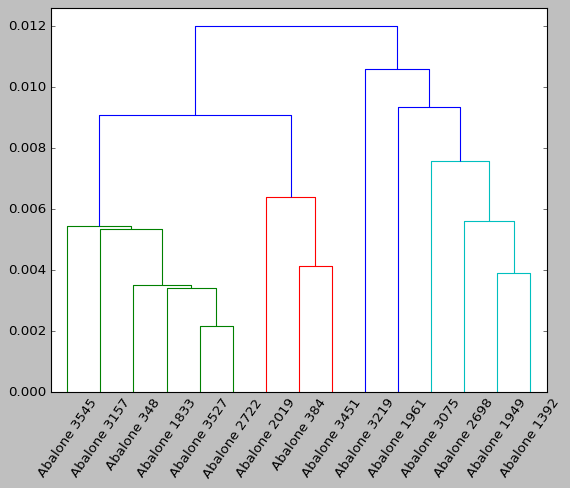

In [ ]:
dendrogram= sch.dendrogram(Hierarchical, labels=['Abalone '+ str(i) for i in abaloneH.index], leaf_rotation=55)

In [ ]:
cluster = fcluster(Hierarchical, t=3, criterion='maxclust')
cluster

array([3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
abaloneC = abaloneH.copy()
abaloneC['Cluster'] = cluster
abaloneC

,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings,Cluster
3219,0.019428,0.019351,0.018590,0.022527,0.017693,0.023473,0.026026,0.023708,3
348,0.010793,0.011242,0.012216,0.004362,0.003370,0.005420,0.005037,0.011854,1
2019,0.014679,0.016771,0.014341,0.011014,0.010531,0.011279,0.011390,0.013336,1
3527,0.010074,0.009583,0.009560,0.002836,0.002637,0.002600,0.003218,0.010372,1
2698,0.019140,0.018614,0.017527,0.021675,0.021924,0.023254,0.020149,0.013336,2
384,0.015686,0.015665,0.014341,0.013569,0.013663,0.015380,0.013153,0.014817,1
3075,0.019572,0.019166,0.019652,0.024005,0.022528,0.028820,0.022724,0.016299,2
3157,0.012376,0.012901,0.009560,0.006379,0.005769,0.006518,0.006716,0.013336,1
1949,0.018420,0.019535,0.017527,0.019112,0.017455,0.021972,0.019590,0.016299,2
3545,0.013671,0.013269,0.014341,0.006997,0.007180,0.006775,0.006996,0.011854,1


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)     # the model is created
pca_abalone = pca.fit_transform(abaloneH)
pca_abaloneDF = pd.DataFrame(data=pca_abalone, columns=["comp_1", "comp_2"])
pca_names_abalone = pca_abaloneDF.copy()
pca_names_abalone["Cluster"] = cluster-1 
pca_names_abalone

,comp_1,comp_2,Cluster
0,0.021080,0.007301,2
1,-0.018619,0.000916,0
2,-0.004086,0.000113,0
3,-0.023115,0.000331,0
4,0.017524,-0.004448,1
5,0.001447,-0.000550,0
6,0.023849,-0.003284,1
7,-0.014995,0.001599,0
8,0.014064,-0.000385,1
9,-0.012763,-0.000212,0


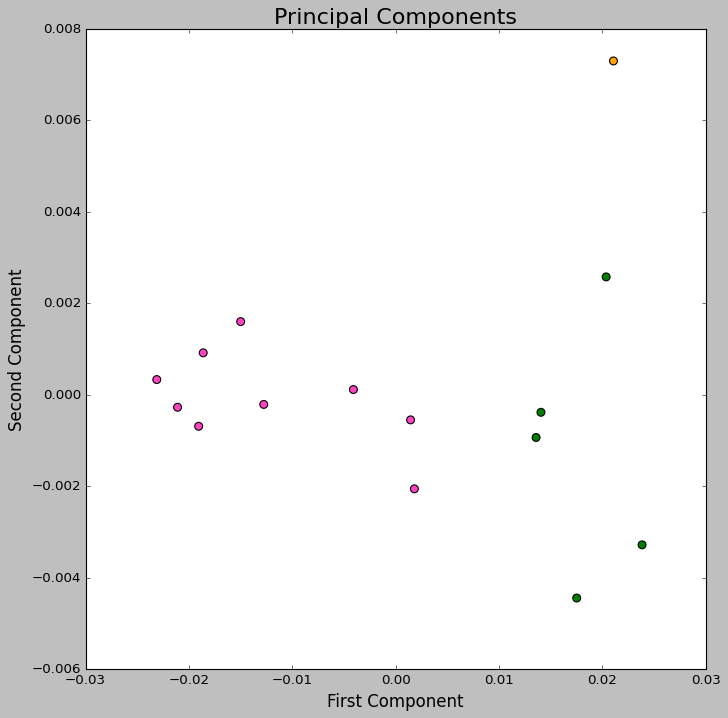

In [ ]:
fig = plt.figure(figsize = (10,10));
ax = fig.add_subplot(1,1,1);
ax.set_xlabel("First Component", fontsize=15 );
ax.set_ylabel("Second Component", fontsize=15 );
ax.set_title("Principal Components", fontsize= 20);

color_theme = np.array(['#ff43c1','green','orange']);
ax.scatter(x=pca_names_abalone.comp_1, y=pca_names_abalone.comp_2, 
                c=color_theme[pca_names_abalone.Cluster], s=50 );